In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

In [2]:
path = r'T:\MPO\RTP\FY20 2045 Update\Data and Resources\PerformanceAnalysis\sidewalk_bikeway_trails'

In [3]:
bikeways = gpd.read_file(os.path.join(path, "Bikeways_MPO.shp"))

In [4]:
bikeways.head()

,Id,geometry
0,1,"LINESTRING (-13695736.452 5477500.916, -136957..."
1,2,"LINESTRING (-13695682.868 5477930.821, -136956..."
2,3,"LINESTRING (-13692366.321 5476009.686, -136923..."
3,4,"LINESTRING (-13701993.554 5464175.914, -137019..."
4,5,"LINESTRING (-13702183.716 5464669.959, -137021..."


In [5]:
bikeways.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
bikeways['mode'] = np.repeat('bikeway', bikeways.shape[0])

In [7]:
sidewalks = gpd.read_file(os.path.join(path, "Sidewalks_MPO.shp")) 

In [8]:
sidewalks.head()

,Id,geometry
0,1,"LINESTRING (-13708454.981 5479024.396, -137084..."
1,2,"LINESTRING (-13708400.224 5478957.938, -137083..."
2,3,"LINESTRING (-13708422.150 5478957.934, -137084..."
3,4,"LINESTRING (-13708444.225 5478958.711, -137084..."
4,5,"LINESTRING (-13708486.574 5478966.349, -137084..."


In [9]:
sidewalks.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
sidewalks['mode'] = np.repeat('sidewalk', sidewalks.shape[0])

In [11]:
sidewalks['Id'] = list(range(bikeways.shape[0]+1,  bikeways.shape[0]+sidewalks.shape[0]+1, 1))

from shapely.geometry.collection import GeometryCollection
sidewalks['geometry'] = sidewalks.geometry.apply(lambda x: x if x else GeometryCollection())
sidewalks = sidewalks.to_crs(epsg=3857)
trails = gpd.read_file(os.path.join(path, "Trails_EUG_SPR.shp"))
trails['mode'] = np.repeat('trail', trails.shape[0])
trails['id'] = list(range(bikeways.shape[0]+sidewalks.shape[0]+1, 
                          bikeways.shape[0]+sidewalks.shape[0]+trails.shape[0]+1, 1))
trails['geometry'] = trails.geometry.apply(lambda x: x if x else GeometryCollection())
trails = trails.to_crs(epsg=3857)

In [12]:
facilities = bikeways[['Id', 'mode', 'geometry']].append(sidewalks[['Id', 'mode', 'geometry']])

In [13]:
facilities.tail()

,Id,mode,geometry
52417,55633,sidewalk,"LINESTRING (-13700092.419 5487092.994, -136999..."
52418,55634,sidewalk,"LINESTRING (-13698439.545 5486681.319, -136982..."
52419,55635,sidewalk,"LINESTRING (-13698598.340 5486661.128, -136985..."
52420,55636,sidewalk,"LINESTRING (-13698605.744 5487253.182, -136986..."
52421,55637,sidewalk,"LINESTRING (-13698415.093 5486388.367, -136984..."


In [14]:
type(facilities)

geopandas.geodataframe.GeoDataFrame

In [15]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

In [16]:
facilities.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
facilities.to_file(os.path.join(path, "facilities.shp"))

In [2]:
import arcpy, os

In [ ]:
#facilities = gpd.clip(facilities, MPObd)

C:\Users\clid1852\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\geopandas\tools\clip.py:64: FutureWarning: Generated spatial index is empty and returned `None`. Future versions of GeoPandas will return zero-length spatial index instead of `None`. Use `len(gdf.sindex) > 0` or `if gdf.sindex` instead of `if gd.sindex is not None` to check for empty spatial indexes.
  gdf_sub = gdf.iloc[gdf.sindex.query(poly, predicate="intersects")]


In [1]:
from arcpy import env
env.overwriteOutput = True

In [7]:
arcpy.analysis.Clip(os.path.join(path, "facilities.shp"), 
                    "V:/Data/Transportation/MPO_Bound.shp", 
                    os.path.join(path, "facilities_mpo.shp"))

<Result 'T:\\MPO\\RTP\\FY20 2045 Update\\Data and Resources\\PerformanceAnalysis\\sidewalk_bikeway_trails\\facilities_mpo.shp'>

In [18]:
facilities = gpd.read_file(os.path.join(path, "facilities_mpo.shp")) 

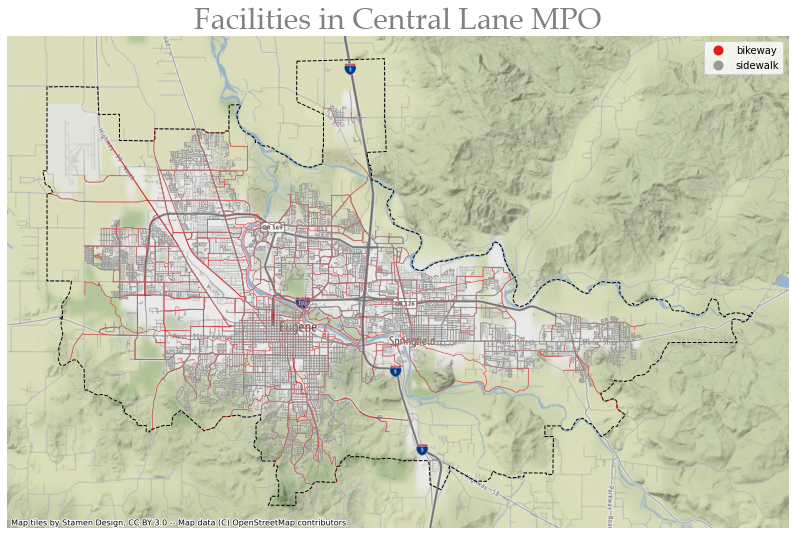

In [19]:
fig, ax = plt.subplots(figsize=(14, 12))
facilities.plot(ax=ax, column='mode', cmap= 'Set1', legend=True, linewidth = 0.5, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', aspect=1)
ctx.add_basemap(ax)
plt.title("Facilities in Central Lane MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

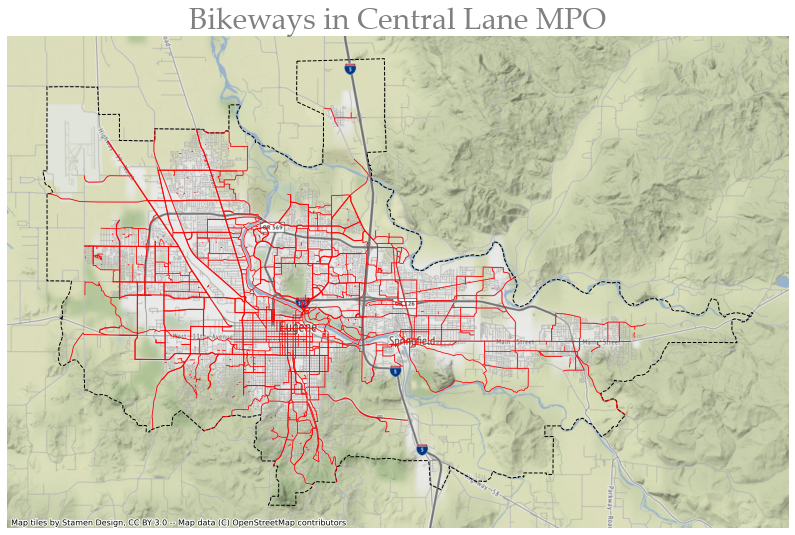

In [20]:
fig, ax = plt.subplots(figsize=(14, 12))
facilities[facilities['mode']=='bikeway'].plot(ax=ax, color = 'red', legend=True, linewidth = 0.8, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', aspect=1)
ctx.add_basemap(ax)
plt.title("Bikeways in Central Lane MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

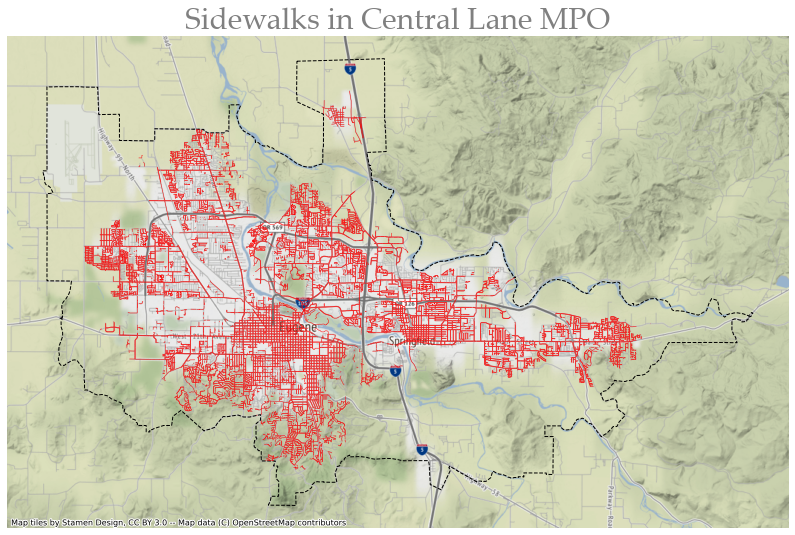

In [21]:
fig, ax = plt.subplots(figsize=(14, 12))
facilities[facilities['mode']=='sidewalk'].plot(ax=ax, color = 'red', legend=True, linewidth = 0.5, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', aspect=1)
ctx.add_basemap(ax)
plt.title("Sidewalks in Central Lane MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [22]:
facilities.to_file(os.path.join(path, "facilities_mpo.shp"))